In [233]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [234]:
# Load the Data
df = pd.read_csv("StudentsPerformancekkk.csv") 

In [235]:
df.head(5)

,Student ID,Gender,Race/Ethnicity,Parent Education,Lunch,Test Preparation Course,Math Score,Reading Score,Writing Score
0,S001,female,group B,bachelor's degree,standard,none,72,72,74
1,S002,female,group C,some college,standard,completed,69,90,88
2,S003,female,group B,master's degree,standard,none,90,95,93
3,S004,male,group A,associate's degree,free/reduced,none,47,57,44
4,S005,male,group C,some college,standard,none,76,78,75


In [236]:
# Check for missing values
print(df.isnull().sum())

Student ID                 0
Gender                     0
Race/Ethnicity             0
Parent Education           0
Lunch                      0
Test Preparation Course    0
Math Score                 0
Reading Score              0
Writing Score              0
dtype: int64


In [237]:
# Check for duplicates
print("Duplicates:", df.duplicated().sum())

Duplicates: 0


In [251]:
# Calculate the top 5 total score
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score'] 

In [252]:
top_5_total = df.nlargest(5, 'total_score')
print(top_5_total[['student_id', 'total_score', 'math_score', 'reading_score', 'writing_score']])

    student_id  total_score  math_score  reading_score  writing_score
458       S459          300         100            100            100
916       S917          300         100            100            100
962       S963          300         100            100            100
114       S115          299          99            100            100
179       S180          297          97            100            100


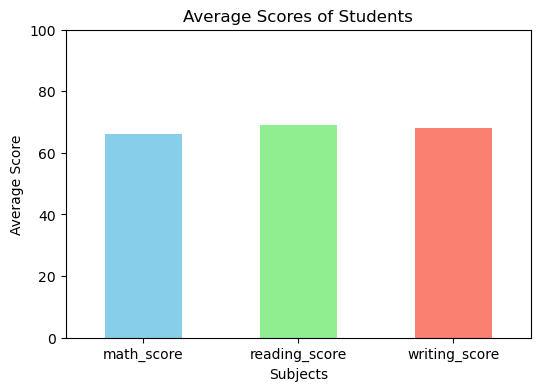

In [253]:

# Calculate average scores
average_scores = df[['math_score', 'reading_score', 'writing_score']].mean()

# Plot bar chart
plt.figure(figsize=(6, 4))
average_scores.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])

plt.title('Average Scores of Students')
plt.xlabel('Subjects')
plt.ylabel('Average Score')
plt.ylim(0, 100)  # Assuming scores are out of 100
plt.xticks(rotation=0)

plt.show()

In [241]:
#Cleaning my Columns  
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [242]:
#Calculate Average Score per Student
df['average_score'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis=1)

In [243]:
#Get Top 5 Students per Gender
top5_by_gender = df.sort_values(by='average_score', ascending=False).groupby('gender').head(5)
print(top5_by_gender[['gender', 'math_score', 'reading_score', 'writing_score', 'average_score']])

     gender  math_score  reading_score  writing_score  average_score
916    male         100            100            100     100.000000
458  female         100            100            100     100.000000
962  female         100            100            100     100.000000
114  female          99            100            100      99.666667
712  female          98            100             99      99.000000
179  female          97            100            100      99.000000
625    male         100             97             99      98.666667
149    male         100            100             93      97.666667
381    male          87            100             95      94.000000
623    male         100             96             86      94.000000


In [244]:
df['parent_education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [245]:
# Count each education level
edu_counts = df['parent_education'].value_counts()

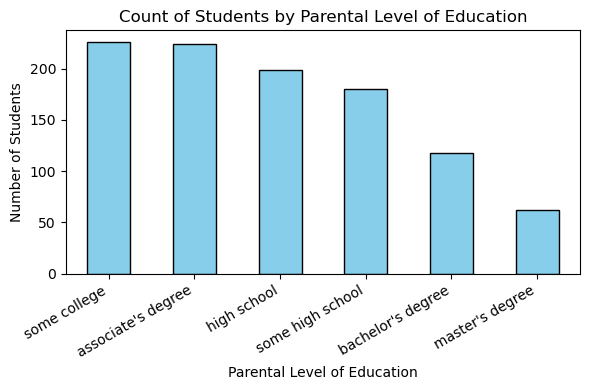

In [246]:
# Plot bar chart
plt.figure(figsize=(6, 4))
edu_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Count of Students by Parental Level of Education')
plt.xlabel('Parental Level of Education')
plt.ylabel('Number of Students')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()

plt.show()

In [247]:
# Count total male students
total_males = df[df['gender'].str.lower() == 'male'].shape[0]

print(f"Total number of male students: {total_males}")

Total number of male students: 487


In [248]:
# Count total female students
total_females = df[df['gender'].str.lower() == 'female'].shape[0]

print(f"Total number of female students: {total_females}")

Total number of female students: 522


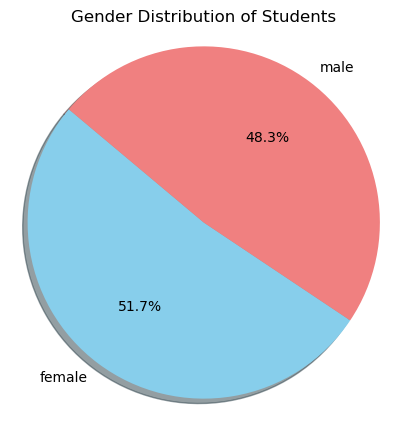

In [249]:
# Count students by gender
gender_counts = df['gender'].value_counts()

# Plot pie chart
plt.figure(figsize=(5,5))
colors = ['skyblue', 'lightcoral']  # Customize colors if you want

plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, shadow=True)
plt.title('Gender Distribution of Students')
plt.axis('equal')  # Equal aspect ratio ensures pie is circular

plt.show()

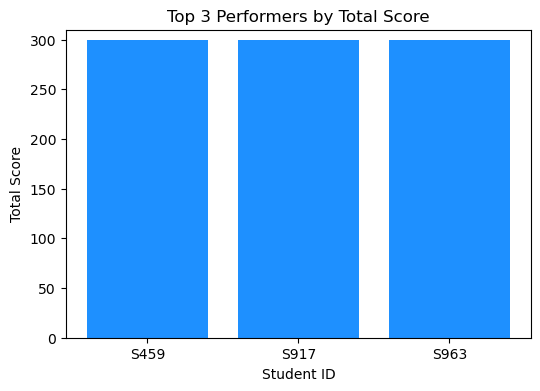

In [250]:
# Calculate total score
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']

# Get top 3 performers
top_3 = df.nlargest(3, 'total_score')

# Plot bar chart
plt.figure(figsize=(6,4))
plt.bar(top_3['student_id'].astype(str), top_3['total_score'], color='dodgerblue')

plt.title('Top 3 Performers by Total Score')
plt.xlabel('Student ID')
plt.ylabel('Total Score')
plt.ylim(0, top_3['total_score'].max() + 10)

plt.show()
